<a href="https://colab.research.google.com/github/jyao25/COVID-3-plots-trial/blob/main/coco's_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Do a scatterplot of each subject's left telencephalon **(type 1 level 1) volume** by their right (left on the vertical axis and right on the horizontal). The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv)
2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot.
3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
4. Let $X_i$ be a group indicator so that
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$.
5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.
6. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. Note formal proof is not required, just the argument.

1. Do a scatterplot of each subject's left telencephalon **(type 1 level 1) volume** by their right (left on the vertical axis and right on the horizontal). The kirby 21 dataset can be found [here](https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv)

# **Scatterplot of Left and Right Telencephalon Volume**

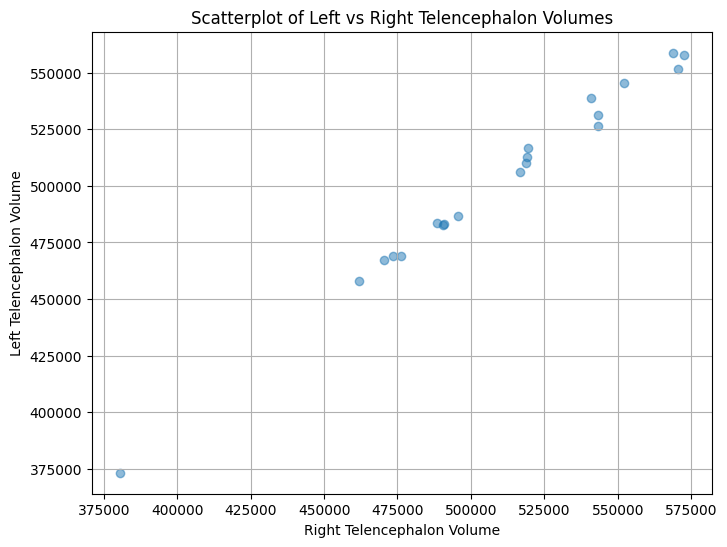

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv"
data = pd.read_csv(url)

# Filter the dataset to only include Telencephalon_L and Telencephalon_R
left_telencephalon = data[data['roi'] == 'Telencephalon_L']['volume']
right_telencephalon = data[data['roi'] == 'Telencephalon_R']['volume']

# Create a scatterplot with left telencephalon volume on the vertical axis and right telencephalon volume on the horizontal axis
plt.figure(figsize=(8, 6))
plt.scatter(right_telencephalon, left_telencephalon, alpha=0.5)
plt.title("Scatterplot of Left vs Right Telencephalon Volumes")
plt.xlabel("Right Telencephalon Volume")
plt.ylabel("Left Telencephalon Volume")
plt.grid(True)
plt.show()


2. Create a vector of the left telencelphalon **(type 1 level 1) volume** values and the right. Demean each. Fit a regression through the origin model with the left telecephalon as the outcome and the right as the predictor. Also do the same with the left as the predictor and the right as the outcome. Plot the fitted lines on your scatterplot.
# **Demean Left and Right Telencephalon Volumes and Fit Regressions**

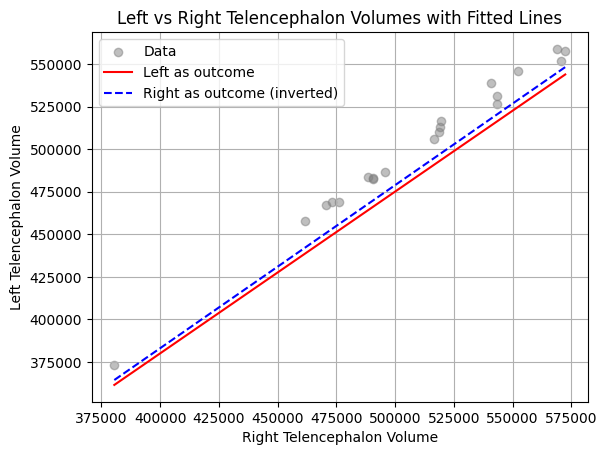

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assume left_telencephalon and right_telencephalon are your data vectors
# Step 1: Demeaning the data
left_telencephalon_demeaned = left_telencephalon - np.mean(left_telencephalon)
right_telencephalon_demeaned = right_telencephalon - np.mean(right_telencephalon)

# Step 2: Fit the regression through the origin
# Regression when left is the outcome and right is the predictor
slope_left = np.sum(left_telencephalon_demeaned * right_telencephalon_demeaned) / np.sum(right_telencephalon_demeaned ** 2)

# Regression when right is the outcome and left is the predictor
slope_right = np.sum(right_telencephalon_demeaned * left_telencephalon_demeaned) / np.sum(left_telencephalon_demeaned ** 2)

# Step 3: Plotting the lines
# Generate points along the x-axis for plotting
x_vals = np.linspace(min(right_telencephalon), max(right_telencephalon), 100)

# Calculate corresponding y-values based on the slope from the regression
y_vals_left = slope_left * x_vals

# For the second model (right as outcome), we calculate using the inverse slope.
# This avoids overlap in the lines and gives us a better visual distinction between the two.
y_vals_right = (1 / slope_right) * x_vals

# Step 4: Plot the scatterplot and regression lines
plt.scatter(right_telencephalon, left_telencephalon, label='Data', color='gray', alpha=0.5)
plt.plot(x_vals, y_vals_left, color='red', label='Left as outcome')
plt.plot(x_vals, y_vals_right, color='blue', linestyle='--', label='Right as outcome (inverted)')

plt.xlabel("Right Telencephalon Volume")
plt.ylabel("Left Telencephalon Volume")
plt.title("Left vs Right Telencephalon Volumes with Fitted Lines")
plt.legend()
plt.grid(True)
plt.show()


3. Consider a regression through the origin model $Y=BX$. What would be the impact on the estimate of $B$ if we replaced $X$ by $cX$ where $c$ is a positive constant?
# **Impact of Scaling X by a Constant c**

Consider a regression through the origin model:

$Y = BX$

The estimate for $B$ is given by:

$B = \frac{\sum_{i=1}^n Y_i X_i}{\sum_{i=1}^n X_i^2}$

Now, if we replace $X$ by $cX$, where $c$ is a positive constant, the model becomes:

$Y = B(cX)$

The new slope estimate,  $B'$, is:

$B' = \frac{\sum_{i=1}^n Y_i (cX_i)}{\sum_{i=1}^n (cX_i)^2}$

This simplifies to:

$B' = \frac{c \sum_{i=1}^n Y_i X_i}{c^2 \sum_{i=1}^n X_i^2}$

$B' = \frac{1}{c} \cdot \frac{\sum_{i=1}^n Y_i X_i}{\sum_{i=1}^n X_i^2}$

Thus, the new estimate $B'$ is:

$B' = \frac{B}{c}$

Conclusion: When $X$ is replaced by $cX$, the estimated slope $B$ is scaled by a factor of $\frac{1}{c}$. In other words, increasing $X$ by a factor of $c$ will decrease the estimated $B$ by a factor of $\frac{1}{c}$, and vice versa.

4. Let $X_i$ be a group indicator so that
$$
X_i = I(i \in G_1)
$$
I.e. takes the value $1$ when $i$ is in group 1 and 0 if $i$ is in group 0. Consider optimizing
$$
\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2.
$$
If $\hat Y = \hat \beta_0 + \hat \beta_1 X$ argue that $\hat Y$ is the group mean for group 1 if $X=1$ and the group mean for group 0 if $X=0$.
# **Group Indicator Optimization**

Let $X_i$ be a group indicator such that:

$X_i = I(i \in G_1)$

This means $X_i = 1$ if $i$ is in group 1, and $X_i = 0$ if $i$ is in group 0. We want to optimize the following expression:

$\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2$

This is the least-squares objective function for a two-group linear regression model, where $\beta_0$ is the intercept, representing the group mean for $X = 0$ (group 0), and $\beta_1$ represents the difference in means between group 1 and group 0.

The fitted values for $\hat{Y}$ are:

$\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X$

This is the least-squares objective function for a two-group linear regression model, where $\beta_0$ is the intercept, representing the group mean for $X = 0$ (group 0), and $\beta_1$ represents the difference in means between group 1 and group 0.

The fitted values for $\hat{Y}$ are:

$\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X$

$X$ disappears (because $X = 0$).

Case 2: Group 1 ($X = 1$)
When $X = 1$, the equation becomes:

$\hat{Y} = \hat{\beta_0} + \hat{\beta_1}$

In this case, $\hat{\beta_0} + \hat{\beta_1}$ represents the mean of $Y$ for group 1. The term $\hat{\beta_1}$ accounts for the difference in means between group 1 and group 0, so $\hat{Y}$ for group 1 is $\hat{\beta_0}$

plus the difference $\hat{\beta_1}$.

Conclusion: The fitted value $\hat{Y}$ is:

* The mean for group 0 when $X = 0$ ($\hat{Y} = \hat{\beta_0}$).
* The mean for group 1 when $X = 1$ ($\hat{Y} = \hat{\beta_0} + \hat{\beta_1}$).

In other words, $\hat{Y}$ represents the group means for $X = 0$ and $X = 1$, corresponding to group 0 and group 1, respectively.



5. Write a python function that takes an X and Y vector and returns an estimated $\beta_0$ and $\beta_1$ from linear regression using only basic functions such as mean, sd and correlation.

# **Linear Regression Function Using Basic Functions**

In [11]:
def simple_linear_regression_labeled(X, Y):
    """
    This function takes vectors X and Y and returns the estimated beta_0 (intercept)
    and beta_1 (slope) using only basic functions like mean, standard deviation, and correlation.
    It returns the results with labels.
    """
    # Calculate means of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    # Calculate standard deviations of X and Y
    sd_X = np.std(X, ddof=1)  # Sample standard deviation
    sd_Y = np.std(Y, ddof=1)  # Sample standard deviation

    # Calculate correlation between X and Y
    correlation = np.corrcoef(X, Y)[0, 1]

    # Calculate beta_1 (slope)
    beta_1 = correlation * (sd_Y / sd_X)

    # Calculate beta_0 (intercept)
    beta_0 = mean_Y - beta_1 * mean_X

    return {"beta_0 (Intercept)": beta_0, "beta_1 (Slope)": beta_1}


In [9]:
## This is only an example to confirm!!!
## The code answering the question is above!!!

import numpy as np

def simple_linear_regression(X, Y):
    """
    This function takes vectors X and Y and returns the estimated beta_0 (intercept)
    and beta_1 (slope) using only basic functions like mean, standard deviation, and correlation.
    """
    # Calculate means of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)

    # Calculate standard deviations of X and Y
    sd_X = np.std(X, ddof=1)  # Sample standard deviation
    sd_Y = np.std(Y, ddof=1)  # Sample standard deviation

    # Calculate correlation between X and Y
    correlation = np.corrcoef(X, Y)[0, 1]

    # Calculate beta_1 (slope)
    beta_1 = correlation * (sd_Y / sd_X)

    # Calculate beta_0 (intercept)
    beta_0 = mean_Y - beta_1 * mean_X

    return beta_0, beta_1

# Example usage:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

beta_0, beta_1 = simple_linear_regression(X, Y)
(beta_0, beta_1)


(2.2, 0.6)

6. Argue that if you take the vectors $Y$ and $X$ and divide them by their standard deviations (respectively), the slope for either regressing $Y$ on $X$ or $X$ on $Y$ is simply the correlation. Note formal proof is not required, just the argument.

# **Slope Equals Correlation After Normalizing**

If we take the vectors $Y$ and $X$ and divide them by their respective standard deviations, we are standardizing these variables. Standardizing transforms both $Y$ and $X$ into z-scores, which have a mean of 0 and a standard deviation of 1.

This process is defined as:

$Y' = \frac{Y}{sd(Y)}$ and $X' = \frac{X}{sd(X)}$

where $sd(Y)$ and $sd(X)$ represent the standard deviations of $Y$ and $X$, respectively.

# Regression of $Y'$ on $X'$:

When we regress $Y'$ on $X'$, the slope $\beta_1'$ is given by:

$\beta_1' = \frac{Cov(Y', X')}{Var(X')}$

Since both  $Y'$ and $X'$ are standardized, their variances are equal to 1, and the covariance between them is the correlation $\rho(X, Y)$. Therefore, the slope simplifies to:

$\beta_1' = \rho(X, Y)$

# Regression of $X'$ on $Y'$:

Similarly, when regressing $X'$ on $Y'$, the slope is:

$\beta_1'' = \frac{Cov(X', Y')}{Var(Y')}$

Again, both variances are 1, and the covariance is the same $\rho(X, Y)$, so the slope also simplifies to:

$\beta_1'' = \rho(X, Y)$

# Conclusion:

When both $Y$ and $X$ are divided by their standard deviations, the slope for regressing $Y$ on $X$, or vice versa, is simply the correlation coefficient $\rho(X, Y)$. This is because standardizing the variables removes the influence of the units and scales, leaving only the strength of the linear relationship, which is quantified by the correlation.